Predicted Speech Emotion: Happy
Predicted Facial Expression Emotion: Happy

Speech Emotion Audio:



Facial Expression Image:


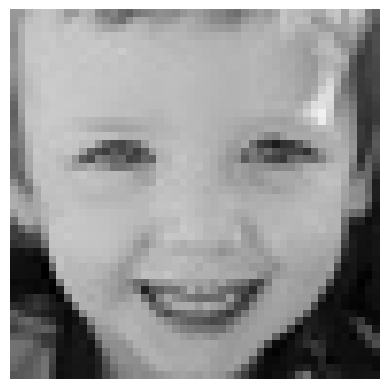

Predicted Speech Emotion: Sad
Predicted Facial Expression Emotion: Sad

Speech Emotion Audio:



Facial Expression Image:


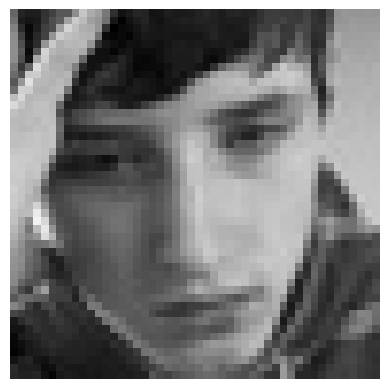

Predicted Speech Emotion: Angry
Predicted Facial Expression Emotion: Angry

Speech Emotion Audio:



Facial Expression Image:


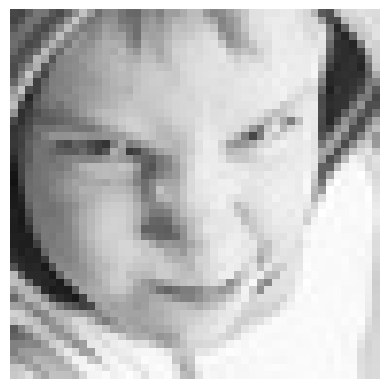

Predicted Speech Emotion: Fear
Predicted Facial Expression Emotion: Fear

Speech Emotion Audio:



Facial Expression Image:


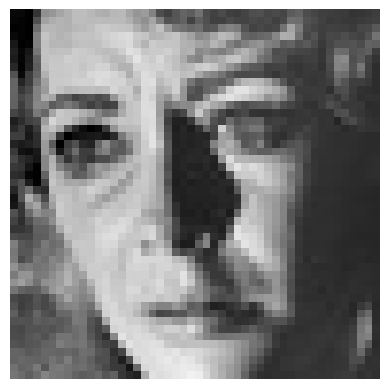

In [14]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

# Load Speech Emotion Recognition Model
speech_model = load_model('emotion_model.h5')

# Load Facial Expression Recognition Model
def load_facial_expression_model():
    # Load pre-trained weights
    model = load_model("model.h5")
    return model

facial_expression_model = load_facial_expression_model()

# Function to predict emotion from speech
def predict_emotion_from_speech(audio_path):
    data, sampling_rate = librosa.load(audio_path, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=-1)
    prediction = speech_model.predict(mfcc)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Function to predict emotion from facial expression
def predict_emotion_from_facial_expression(image_path):
    picture_size = 48
    img = load_img(image_path, target_size=(picture_size, picture_size), grayscale=True)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    prediction = facial_expression_model.predict(img_array)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Function to display and play audio
def display_audio(audio_path):
    return Audio(audio_path)

# Function to display image
def display_image(image_path):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to perform multimodal emotion detection
def multimodal_emotion_detection(audio_path, image_path):
    speech_emotion = predict_emotion_from_speech(audio_path)
    facial_emotion = predict_emotion_from_facial_expression(image_path)
    
    # Mapping labels to emotions
    emotion_mapping = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
    
    print("Predicted Speech Emotion:", emotion_mapping[speech_emotion])
    print("Predicted Facial Expression Emotion:", emotion_mapping[facial_emotion])
    
    print("\nSpeech Emotion Audio:")
    display(display_audio(audio_path))
    
    print("\nFacial Expression Image:")
    display_image(image_path)

# Example usage:
audio_path = 'happy.wav'
image_path = 'happy.jpg'
multimodal_emotion_detection(audio_path, image_path)


audio_path = 'sad.wav'
image_path = 'sad.jpg'
multimodal_emotion_detection(audio_path, image_path)

audio_path = 'angry.wav'
image_path = 'angry.jpg'
multimodal_emotion_detection(audio_path, image_path)

audio_path = 'fear.wav'
image_path = 'fear.jpg'
multimodal_emotion_detection(audio_path, image_path)

